# MACHINE LEARNING PRACTICE

In [3]:
# Mengimport berbagai Libraries yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Parsing

In [4]:
# LOAD DATASET TITANIC
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Check struktur dataframe titanic
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


**NOTES**: Beberapa hal yang harus diperhatikan dari struktur di atas:
1. Cek seperti apa kategori yang dilakukan pada kolom `who`;
2. Dari struktur tersebut di atas, kolom `pclass` berisikan data numeric, seharusnya kolom tersebut berisi data `str` karena merupakan `category`.


In [6]:
# Checking uniqe values of `who` column
titanic['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [7]:
# Reclassify values in `who` column, `man` and `woman` is turned into `adult`
titanic['who'] = titanic['who'].apply(lambda x: {'man':'adult', 'woman':'adult'}.get(x, 'child'))
titanic['who'].unique()

array(['adult', 'child'], dtype=object)

In [8]:
# Casting values of `pclass` into `string`
titanic['pclass'] = titanic['pclass'].astype('str')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    object  
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(3), object(6)
memory usage: 80.7+ KB


In [9]:
# Checking Descriptive Statistic for numeric columns
titanic.describe()

,survived,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Checking Descriptive Stats for `object` columns
titanic.describe(include='object')

,pclass,sex,embarked,who,embark_town,alive
count,891,891,889,891,889,891
unique,3,2,3,2,3,2
top,3,male,S,adult,Southampton,no
freq,491,577,644,808,644,549


## Feature Selection

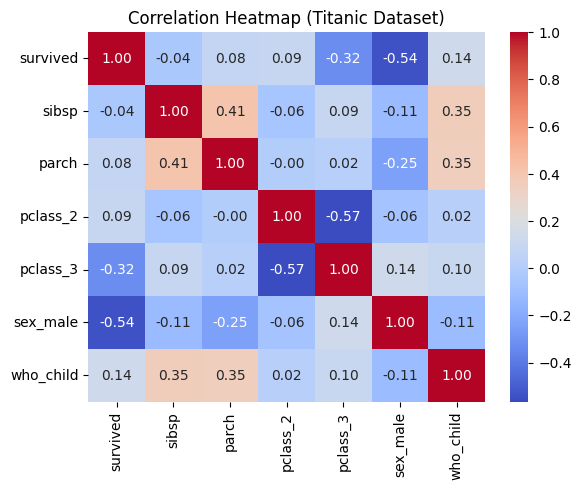

In [11]:
# Feature Selection
# 1. Making a list of selected features
list_of_vars = ['survived', 'pclass', 'sibsp', 'parch', 'sex', 'who']
# 2. Slicing DataFrame with the selected features
df = titanic[list_of_vars]
# 3. Encoding values of categorical features
df_final = pd.get_dummies(df, drop_first=True)

# Checking Correlation between features via a heatmap
plt.Figure(figsize=(8, 6))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Titanic Dataset)")
plt.show()

# Train/Test splitting
y = df_final['survived']
X = df_final.drop('survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MODELLING

### `LOGISTIC REGRESSION`

In [12]:
# Train model
model_LR = LogisticRegression(max_iter=200)
model_LR.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [13]:
# Making logistic regression prediction
y_pred_LR =model_LR.predict(X_test)

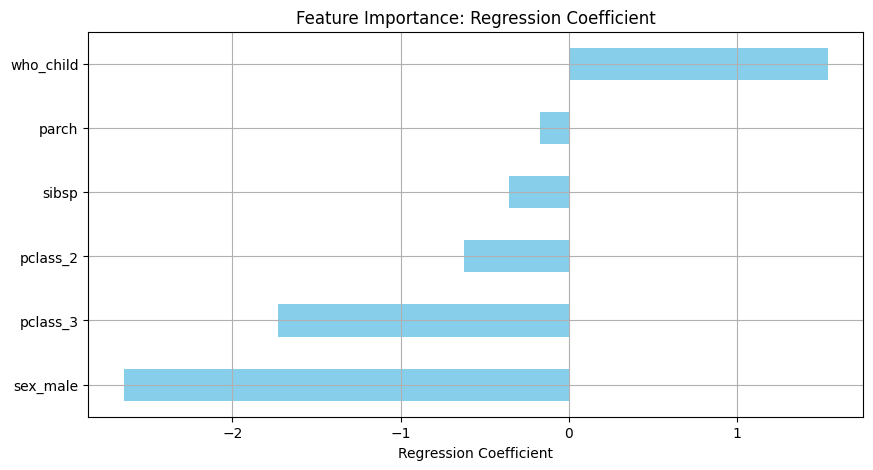

In [14]:
# Visualisai feature importance
(pd.Series(model_LR.coef_[0], index=X.columns)
 .sort_values()
 .plot(figsize=(10, 5), 
       kind='barh', 
       grid=True, 
       title="Feature Importance: Regression Coefficient", 
       xlabel="Regression Coefficient", 
       color='skyblue'))
plt.show()

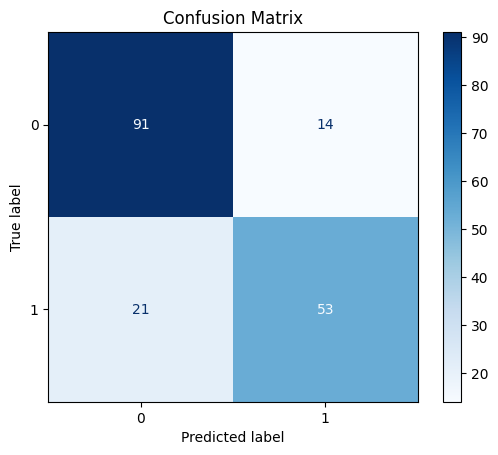

Hasil Regresi Logistic :
Akurasi : 0.8044692737430168

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [15]:
# Evaluation
# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_LR.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Hasil Regresi Logistic :")
print("Akurasi :", accuracy_score(y_test, y_pred_LR))
print("\nClassification Report :\n", classification_report(y_test, y_pred_LR))

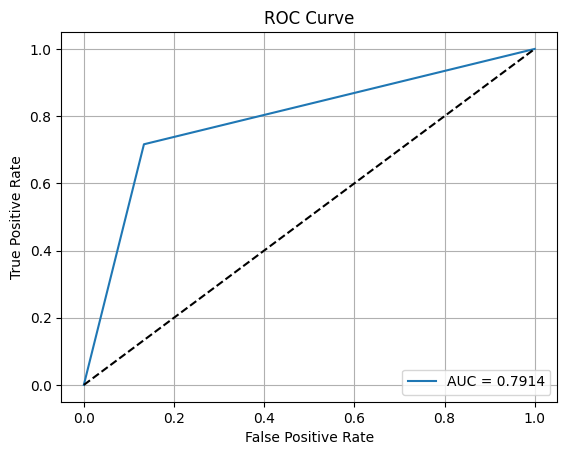

In [16]:
# Receiver Operating Characteristic Curve
fprLR, tprLR, _ = roc_curve(y_test, y_pred_LR)
aucLR  = roc_auc_score(y_test, y_pred_LR)
plt.Figure(figsize=(8, 6))
plt.plot(fprLR, tprLR, label=f"AUC = {aucLR:.4f}")
plt.plot([0,1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

---